In [1]:
import numpy as nm
import pandas as pd
import scipy.stats as stats
import matplotlib as plt
import sklearn
import seaborn as sns

%matplotlib inline

In [2]:
location = "datasets/DC_properties.csv"
df = pd.read_csv (location)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.keys()

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [4]:
df.shape

(158957, 49)

In [25]:
df2 = df[['BATHRM', 'HF_BATHRM', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES',  'GBA', 
        'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'ZIPCODE','PRICE',]]

In [26]:
df2.shape

(158957, 16)

In [27]:
df2.isnull().sum()

BATHRM            0
HF_BATHRM         0
NUM_UNITS     52261
ROOMS             0
BEDRM             0
AYB             271
YR_RMDL       78029
EYB               0
STORIES       52305
GBA           52261
KITCHENS      52262
FIREPLACES        0
USECODE           0
LANDAREA          0
ZIPCODE           1
PRICE         60741
dtype: int64

In [28]:
df3 = df2.dropna()

In [29]:
df3.isnull().sum()

BATHRM        0
HF_BATHRM     0
NUM_UNITS     0
ROOMS         0
BEDRM         0
AYB           0
YR_RMDL       0
EYB           0
STORIES       0
GBA           0
KITCHENS      0
FIREPLACES    0
USECODE       0
LANDAREA      0
ZIPCODE       0
PRICE         0
dtype: int64

In [30]:
df3.shape

(33170, 16)

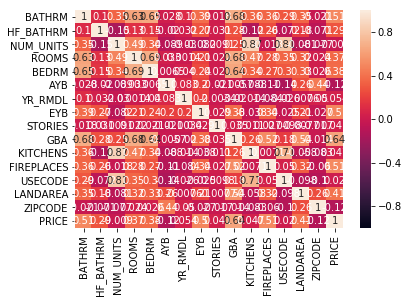

In [36]:
corr = df3.corr()
sns.heatmap(corr, vmin=-1, annot=True)

In [37]:
price = df3[["PRICE"]]

In [38]:
price.shape

(33170, 1)

In [39]:
x = df3[['BATHRM', 'HF_BATHRM', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES',  'GBA', 
        'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'ZIPCODE']]

In [40]:
x.head()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,GBA,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE
0,4,0,2.0,8,4,1910.0,1988.0,1972,3.0,2522.0,2.0,5,24,1680,20009.0
2,3,1,2.0,9,5,1910.0,2009.0,1984,3.0,2522.0,2.0,4,24,1680,20009.0
3,3,1,2.0,8,5,1900.0,2003.0,1984,3.0,2484.0,2.0,3,24,1680,20009.0
7,3,1,2.0,8,4,1906.0,2011.0,1972,3.0,2401.0,2.0,1,24,1627,20009.0
8,3,1,2.0,7,3,1908.0,2008.0,1967,2.0,1488.0,2.0,1,24,1424,20009.0


In [48]:
from sklearn.linear_model import LinearRegression
X=df3
lm=LinearRegression()
lm
lm.fit(X,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: [  4.36557457e-08]


In [47]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 1


,features,estimatedCoefficients
0,BATHRM,"[1.21977454194e-10, 2.41530917489e-09, -1.5968..."
